In [ ]:
!pip install ModulationPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from ModulationPy import PSKModem, QAMModem
from scipy import signal, special
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import pandas as pd
from tqdm.auto import tqdm
from IPython.display import clear_output
from IPython.display import display
from ipywidgets import IntProgress
from google.colab import drive
import shutil
from datetime import datetime
import pickle
#import py7zr
from numba import njit
import seaborn as sns

import random

In [ ]:
tqdm.pandas()

In [ ]:

def gen_PSK_signal(M = 2, len_out_signal = 120):
    modem = PSKModem(M, 0, 
                 bin_input=True,
                 soft_decision=False,
                 bin_output=True)
    
    len_signal = int(np.log2(M)) * len_out_signal
    msg = [1 if x > 0.5 else 0 for x in np.random.randn(1, len_signal)[0]]  # Вызов случайной функции для генерации любой матрицы 1 * nb от 0 до 1, которая больше 0,5 как 1 и меньше 0,5 как 0
    modulated = modem.modulate(msg) 
    return modulated, msg

In [ ]:
import seaborn as sns

In [ ]:

def gen_QAM_signal(M = 16, len_out_signal = 120):
    modem = QAMModem(M, 0, 
                 bin_input=True,
                 soft_decision=False,
                 bin_output=True)
    
    len_signal = int(np.log2(M)) * len_out_signal
    msg = [1 if x > 0.5 else 0 for x in np.random.randn(1, len_signal)[0]]  # Вызов случайной функции для генерации любой матрицы 1 * nb от 0 до 1, которая больше 0,5 как 1 и меньше 0,5 как 0
    modulated = modem.modulate(msg) 
    return modulated, msg

In [ ]:
len_sig = 1000
N = 1000
print(len(gen_PSK_signal(M = 2, len_out_signal = len_sig)[0]))
print(len(gen_PSK_signal(M = 4, len_out_signal = len_sig)[0]))
print(len(gen_PSK_signal(M = 8, len_out_signal = len_sig)[0]))
print(len(gen_PSK_signal(M = 16, len_out_signal = len_sig)[0]))

print(len(gen_QAM_signal(M = 4, len_out_signal = len_sig)[0]))
print(len(gen_QAM_signal(M = 16, len_out_signal = len_sig)[0]))
print(len(gen_QAM_signal(M = 64, len_out_signal = len_sig)[0]))
print(len(gen_QAM_signal(M = 256, len_out_signal = len_sig)[0]))
print('OK')
print(len(gen_PSK_signal(M = 2, len_out_signal = len_sig)[1]))
print(len(gen_PSK_signal(M = 4, len_out_signal = len_sig)[1]))
print(len(gen_PSK_signal(M = 8, len_out_signal = len_sig)[1]))
print(len(gen_PSK_signal(M = 16, len_out_signal = len_sig)[1]))

print(len(gen_QAM_signal(M = 4, len_out_signal = len_sig)[1]))
print(len(gen_QAM_signal(M = 16, len_out_signal = len_sig)[1]))
print(len(gen_QAM_signal(M = 64, len_out_signal = len_sig)[1]))
print(len(gen_QAM_signal(M = 256, len_out_signal = len_sig)[1]))

1000
1000
1000
1000
1000
1000
1000
1000
OK
1000
2000
3000
4000
2000
4000
6000
8000


In [ ]:
#gen_PSK_signal(M = 2, len_out_signal = len_sig)[0]

In [ ]:
sig = gen_PSK_signal(M = 2, len_out_signal = len_sig)[0]

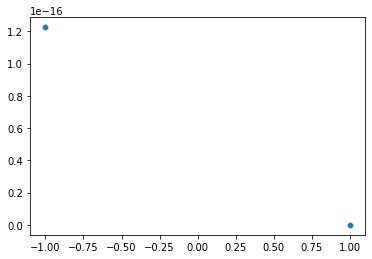

In [ ]:
sns.scatterplot(#data = df_plot,
                x = sig.real,
                y = sig.imag, 
                #hue = 'type_mod'
)

In [ ]:

def mod_signals(modulated, fc = 1 * 10**3,T = 1,fs = 10**4):
    I = modulated.real
    Q = modulated.imag
    start_phi = np.random.uniform(0,2 * np.pi)
    nb = len(I)
    t = np.arange(0, T, 1/fs)
    N = len(t)
    I_0, Q_0 = [], []
    for i in range(len(I)):
        I_0 += [I[i]]*int(fs/nb*T)
        Q_0 += [Q[i]]*int(fs/nb*T)

    cos_arr = []     # Косинус функциональный носитель
    sin_arr = []     # Синус функциональный носитель
    #ProgBar_cos_sin = IntProgress(min=0, max=N, value=0)
    #display(ProgBar_cos_sin)
    for j in (range(int(N))):
        cos_arr.append(np.math.sqrt(2/T)*np.math.cos(2*np.math.pi*fc*t[j] + start_phi) )    # Косинус функциональный носитель
        sin_arr.append(np.math.sqrt(2/T)*np.math.sin(2*np.math.pi*fc*t[j] + start_phi)  )    # Синус функциональный носитель
        #if j / N % 0.1 == 0.0:
            #ProgBar_cos_sin.value = j
    #ProgBar_cos_sin.value = j
    I_0 = I_0 + [I_0[-1]] * ( len(cos_arr) - len(I_0) )
    Q_0 = Q_0 + [Q_0[-1]] * ( len(cos_arr) - len(Q_0) )
    idata1 = np.array(I_0)*np.array(cos_arr)          
    qdata1 = np.array(Q_0)*np.array(sin_arr)  
    s = idata1 + qdata1 
    return s


In [ ]:
df = pd.DataFrame()
#df = pd.read_pickle(f'SIGNALS_DF_{datetime.now().date()}.pkl')
N = 3 * 10**3
lens_sig = np.array([1])
while lens_sig.min() < 30:
    lens_sig = np.absolute(np.random.normal(1000, 300, N)).astype(int)
print(lens_sig.min())
print(lens_sig.max())
len(lens_sig)

44
1968


3000

In [ ]:
lens_sig = [300 for i in range(300)]

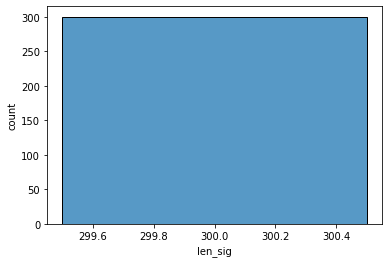

In [ ]:
ax = sns.histplot(lens_sig)
#ax.figure(figsize=(20, 10))
ax.set(xlabel='len_sig', ylabel='count')
plt.show()

In [ ]:

def save_and_move(df, name_file):
    df.reset_index(drop=True,inplace=True)
    print('saving')
    df[:25000].to_pickle(name_file + '_part_1' + '.pkl',protocol = 4)
    df[25000:].to_pickle(name_file + '_part_2' + '.pkl',protocol = 4)
    print('Save OK')
    del(df)
    with py7zr.SevenZipFile(name_file + '_part_1' + '.7z', 'w') as z:
        z.writeall(name_file + '_part_1' + '.pkl')
    with py7zr.SevenZipFile(name_file + '_part_2' + '.7z', 'w') as z:
        z.writeall(name_file + '_part_2' + '.pkl')
    print('archive ok')
    shutil.copy(name_file + '_part_1' + '.7z', "/content/drive/MyDrive/CURS_22_DF/SIGNALS")
    shutil.copy(name_file + '_part_2' + '.7z', "/content/drive/MyDrive/CURS_22_DF/SIGNALS")
    print('Move ok')


In [ ]:
%%time
list_PSK_M = [2, 4, 8, 16]
T = 1
for M in (list_PSK_M):
    #df = 0
    #df = pd.DataFrame()
    #for fc in range(1000,10001,1000):
    fc = 10**3  
    fs = 10**4

    type_sig = 'PSK'
    name_file = f'{type_sig}_{M}_{datetime.now().date()}'
    print(name_file)
    for len_sig in tqdm(lens_sig):

        #print(f'M = {M}')
        #print(f'fc = {fc}')
        SIG, msg = gen_PSK_signal(M, len_sig)

        #mod_signal = [mod_signals(SIG,fc = fc, T = T)]
        
        df_add = pd.DataFrame({#'signal':mod_signal,
                               "type_sig":type_sig + '_' + str(M),
                               #'M':M,'fc': fc, 'fs':fs ,'T':T, 'msg':[msg], 
                               'signal_IQ':[SIG]} ) 
        df = pd.concat([df,df_add])
        #del(df_add)
        #clear_output(True)

    #save_and_move(df, name_file)

PSK_2_2023-01-21


  0%|          | 0/300 [00:00<?, ?it/s]

PSK_4_2023-01-21


  0%|          | 0/300 [00:00<?, ?it/s]

PSK_8_2023-01-21


  0%|          | 0/300 [00:00<?, ?it/s]

PSK_16_2023-01-21


  0%|          | 0/300 [00:00<?, ?it/s]

CPU times: user 2.79 s, sys: 84.4 ms, total: 2.87 s
Wall time: 3.59 s


In [ ]:
%%time
list_QAM_M = [4, 16, 64, 256]
T = 1
for M in (list_QAM_M):
    print(M)
    #df = pd.DataFrame()
    #for fc in range(1000,10001,1000):
    fc = 10**3  
    fs = 10**4
    type_sig = 'QAM'
    name_file = f'{type_sig}_{M}_{datetime.now().date()}'
    print(name_file)
    for len_sig in tqdm(lens_sig):

        #print(f'M = {M}')
        #print(f'fc = {fc}')
        SIG, msg = gen_QAM_signal(M,len_sig)

        #mod_signal = [mod_signals(SIG,fc = fc, T = T)]
        
        df_add = pd.DataFrame({#'signal':mod_signal,
                               "type_sig":type_sig + '_' + str(M),
                               #'M':M,'fc': fc, 'fs':fs ,'T':T, 'msg':[msg], 
                               'signal_IQ':[SIG]} )  
        df = pd.concat([df,df_add])
        #clear_output(True)

    #save_and_move(df, name_file)

4
QAM_4_2023-01-21


  0%|          | 0/300 [00:00<?, ?it/s]

16
QAM_16_2023-01-21


  0%|          | 0/300 [00:00<?, ?it/s]

64
QAM_64_2023-01-21


  0%|          | 0/300 [00:00<?, ?it/s]

256
QAM_256_2023-01-21


  0%|          | 0/300 [00:00<?, ?it/s]

CPU times: user 4.69 s, sys: 157 ms, total: 4.84 s
Wall time: 8.67 s


In [ ]:
df.type_sig.value_counts()

PSK_2      300
PSK_4      300
PSK_8      300
PSK_16     300
QAM_4      300
QAM_16     300
QAM_64     300
QAM_256    300
Name: type_sig, dtype: int64

In [ ]:
df

,type_sig,signal_IQ
0,PSK_2,"[(1+0j), (1+0j), (1+0j), (-1+1.224646799147353..."
0,PSK_2,"[(1+0j), (1+0j), (-1+1.2246467991473532e-16j),..."
0,PSK_2,"[(1+0j), (-1+1.2246467991473532e-16j), (1+0j),..."
0,PSK_2,"[(1+0j), (1+0j), (1+0j), (1+0j), (-1+1.2246467..."
0,PSK_2,"[(1+0j), (1+0j), (1+0j), (-1+1.224646799147353..."
...,...,...
0,QAM_256,"[(-15+11j), (5-11j), (-5+15j), (9+15j), (-11+5..."
0,QAM_256,"[(9+15j), (-13-7j), (-11+15j), (5+15j), (-7-1j..."
0,QAM_256,"[(-11-9j), (3+11j), (1-1j), (-11+3j), (-13+5j)..."
0,QAM_256,"[(9+15j), (-15+3j), (-3+15j), (-15+5j), (-15+1..."


In [ ]:
# df.to_pickle('12_12_df_signals.pkl',protocol = 4)



In [ ]:
def shift_angl(num, phi):
    x1 = num.real
    y1 = num.imag
    if x1 != 0:
        ang = np.arctan(abs(y1)/abs(x1))
    else:
        ang = np.pi * y1 / abs(y1)
    if x1 < 0 and y1 > 0:
        ang += np.pi/2
    elif x1 < 0 and y1 < 0:
        ang += np.pi
    elif x1 > 0 and y1 < 0:
        ang += np.pi * 3/2
    r = np.sqrt(x1**2 + y1**2)
    new_ang = ang + phi
    new_x, new_y = r * np.cos(new_ang), r * np.sin(new_ang)
    return new_x + 1j * new_y
shift_angl = np.vectorize(shift_angl)

In [ ]:
def noise( x, N):
        snr_dB=N
        snr = 10**(snr_dB/10)
        sigmaN2 = 1/snr

        # generate AWGN
        n = (sigmaN2**0.5)*(np.random.randn(len(x)) + 1j*np.random.randn(len(x)))
        return x + n

def scale_data(df):
    df_w_r = df.copy()

    df_w_r['signal_IQ'] = df_w_r['signal_IQ'].progress_apply(lambda x: x / np.sqrt(x.real ** 2 + x.imag ** 2).max())
    return df_w_r
def shift_phi(df):
    df_w_phi = df.copy()
    df_w_phi['signal_IQ'] = df_w_phi['signal_IQ'].progress_apply(lambda x: shift_angl(x,random.uniform(-np.pi, np.pi)))
    return df_w_phi

def make_noise(df, N):
    df_w = df.copy()
    df_w['signal_IQ'] = df_w['signal_IQ'].apply(lambda x: noise(x, N))
    return df_w

In [ ]:
df_scale_shift = shift_phi( scale_data(df) )

  0%|          | 0/24000 [00:00<?, ?it/s]

  0%|          | 0/24000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
df_scale_shift.to_pickle('19_12_scale_df_signals.pkl',protocol = 4)

NameError: ignored

In [ ]:
drive.mount('/content/drive')
shutil.copy('19_12_scale_df_signals.pkl', "/content/drive/MyDrive/CURS_22_DF")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/CURS_22_DF/19_12_scale_df_signals.pkl'

In [ ]:
# with py7zr.SevenZipFile('09_11_df_signals.7z', 'w') as z:
#         z.writeall('09_11_df_signals.pkl')

In [ ]:
#shutil.copy('12_12_df_signals.pkl', "/content/drive/MyDrive/CURS_22_DF")

In [ ]:
df.signal_IQ.apply(lambda x: len(x)).max(),df.signal_IQ.apply(lambda x: len(x)).min()

(1989, 33)

In [ ]:
df['type_sig'].value_counts()

PSK_2      100
PSK_4      100
PSK_8      100
PSK_16     100
QAM_4      100
QAM_16     100
QAM_64     100
QAM_256    100
Name: type_sig, dtype: int64

In [ ]:
df

,type_sig,signal_IQ
0,PSK_2,"[(0.15425144988758405-0.9880316240928618j), (0..."
0,PSK_2,"[(0.15425144988758405-0.9880316240928618j), (0..."
0,PSK_2,"[(0.15425144988758405-0.9880316240928618j), (0..."
0,PSK_2,"[(0.15425144988758405-0.9880316240928618j), (0..."
0,PSK_2,"[(0.15425144988758405-0.9880316240928618j), (0..."
...,...,...
0,QAM_256,"[(-9+7j), (-13+9j), (-15+15j), (-13+15j), (1+5..."
0,QAM_256,"[(-7-13j), (-9+5j), (-13+11j), (-15+7j), (-7+7..."
0,QAM_256,"[(-11-9j), (-1+5j), (-15-5j), (-13+7j), (1+5j)..."
0,QAM_256,"[(-15-3j), (-13+11j), (1-9j), (-3+7j), (-9+7j)..."


In [ ]:
#df_scale = scale_data(df)

In [ ]:
# df_scale

In [ ]:

# df_scale['imag'] = df_scale.signal_IQ.apply(lambda x: x.imag)
# df_scale['real'] = df_scale.signal_IQ.apply(lambda x: x.real)

In [ ]:
#row

In [ ]:
plt.figure(figsize=(20, 10))
grid = sns.FacetGrid(df_plot, col = "type_sig", hue = "type_sig", col_wrap=4)
grid.map(sns.scatterplot, "real", "imag")
grid.add_legend()

plt.show()

In [ ]:
df_prep.signal_IQ.iloc[0][0].real

0.15425144988758405

In [ ]:
df_plot_2

,real,imag,type_mod
0,0.154251,-0.988032,PSK_2
1,0.154251,-0.988032,PSK_2
2,-0.154251,0.988032,PSK_2
3,0.154251,-0.988032,PSK_2
4,-0.154251,0.988032,PSK_2
...,...,...,...
79995,-0.707107,0.518545,PSK_2
79996,-0.612826,-0.141421,PSK_2
79997,0.235702,0.707107,PSK_2
79998,-0.141421,0.235702,PSK_2


In [ ]:
len(lens_sig)

300

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

<Figure size 1440x720 with 0 Axes>

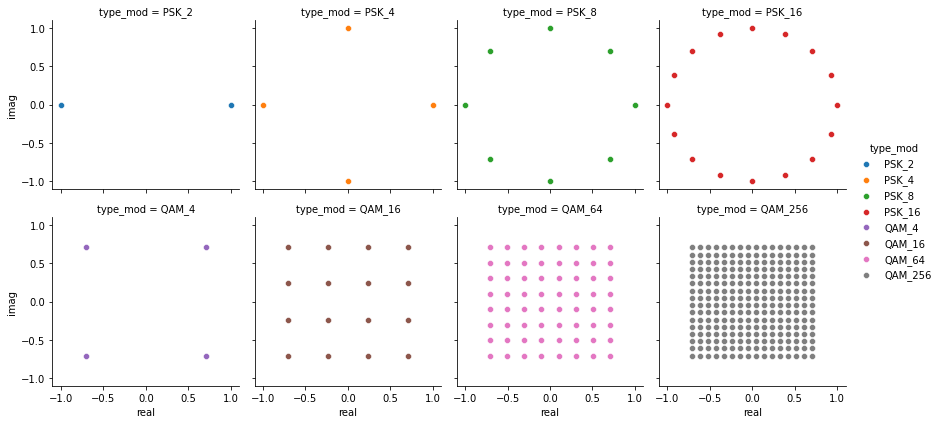

In [ ]:
df_prep = scale_data(df).copy()
i = 0
df_plot_2 = pd.DataFrame()
type_mod = df_prep.type_sig.unique()
for part in tqdm(range(0000,8 * len(lens_sig),len(lens_sig))):
    x = np.array(df_prep.signal_IQ.iloc[part:part + len(lens_sig)].to_list()).ravel().real
    y = np.array(df_prep.signal_IQ.iloc[part:part + len(lens_sig)].to_list()).ravel().imag
    df_add = pd.DataFrame()
    df_add['real'] = x
    df_add['imag'] = y
    df_add['type_mod'] = type_mod[i]
    df_plot_2 = pd.concat([df_plot_2, df_add])
    i+=1
df_plot_2
plt.figure(figsize=(20, 10))
grid = sns.FacetGrid(df_plot_2.drop_duplicates(), col = "type_mod", hue = "type_mod", col_wrap=4)
grid.map(sns.scatterplot, "real", "imag")
grid.add_legend()

plt.show()
df_plot_2.to_csv('signals.csv')

In [ ]:
df_plot_2

,real,imag,type_mod
0,1.000000,0.000000e+00,PSK_2
1,1.000000,0.000000e+00,PSK_2
2,-1.000000,1.224647e-16,PSK_2
3,1.000000,0.000000e+00,PSK_2
4,-1.000000,1.224647e-16,PSK_2
...,...,...,...
89995,-0.707107,7.071068e-01,QAM_256
89996,-0.707107,6.128259e-01,QAM_256
89997,-0.707107,7.071068e-01,QAM_256
89998,-0.612826,6.128259e-01,QAM_256


<Figure size 1800x1080 with 0 Axes>

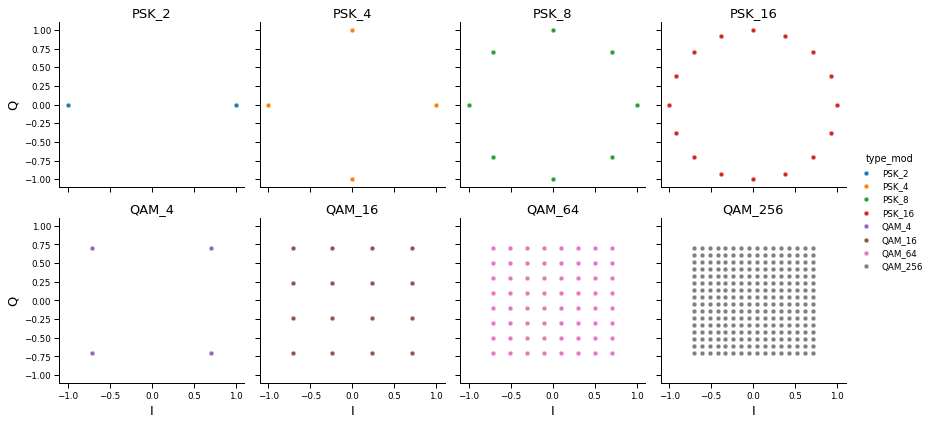

In [ ]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":13})
plt.figure(figsize=(25, 15))
grid = sns.FacetGrid(df_plot_2.drop_duplicates(), col = "type_mod"#, hue = "type_mod",
                     ,col_wrap=4
                     , hue = "type_mod"
                     , margin_titles=True)
grid.map(sns.scatterplot, "real", "imag")
grid.add_legend()
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.set_axis_labels("I", "Q")
plt.show()

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

<Figure size 1800x1080 with 0 Axes>

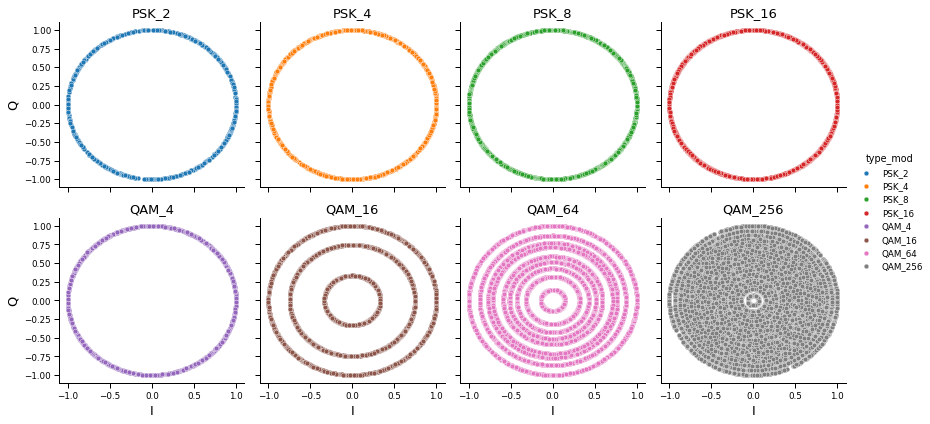

In [ ]:
df_prep = shift_phi(scale_data(df)).copy()
i = 0
df_plot_2 = pd.DataFrame()
type_mod = df_prep.type_sig.unique()
for part in tqdm(range(0000,8 * len(lens_sig),len(lens_sig))):
    x = np.array(df_prep.signal_IQ.iloc[part:part + len(lens_sig)].to_list()).ravel().real
    y = np.array(df_prep.signal_IQ.iloc[part:part + len(lens_sig)].to_list()).ravel().imag
    df_add = pd.DataFrame()
    df_add['real'] = x
    df_add['imag'] = y
    df_add['type_mod'] = type_mod[i]
    df_plot_2 = pd.concat([df_plot_2, df_add])
    i+=1
df_plot_2
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":13})
plt.figure(figsize=(25, 15))
grid = sns.FacetGrid(df_plot_2.drop_duplicates(), col = "type_mod", hue = "type_mod"
                     ,col_wrap=4
                     , margin_titles=True)
grid.map(sns.scatterplot, "real", "imag")
grid.add_legend()
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.set_axis_labels("I", "Q")
plt.show()
df_plot_2.to_csv('signal_phi.csv')

In [ ]:
shift = df_prep.copy()

  0%|          | 0/8 [00:00<?, ?it/s]

<Figure size 1800x1080 with 0 Axes>

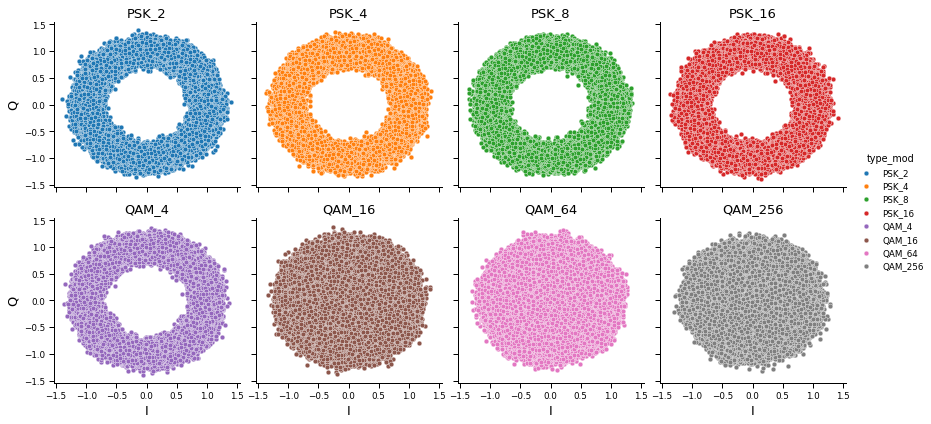

In [ ]:
df_prep = make_noise(shift,20).copy()
i = 0
df_plot_2 = pd.DataFrame()
type_mod = df_prep.type_sig.unique()
for part in tqdm(range(0000,8 * len(lens_sig),len(lens_sig))):
    x = np.array(df_prep.signal_IQ.iloc[part:part + len(lens_sig)].to_list()).ravel().real
    y = np.array(df_prep.signal_IQ.iloc[part:part + len(lens_sig)].to_list()).ravel().imag
    df_add = pd.DataFrame()
    df_add['real'] = x
    df_add['imag'] = y
    df_add['type_mod'] = type_mod[i]
    df_plot_2 = pd.concat([df_plot_2, df_add])
    i+=1
df_plot_2
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":13})
plt.figure(figsize=(25, 15))
grid = sns.FacetGrid(df_plot_2.drop_duplicates(), col = "type_mod", hue = "type_mod"
                     ,col_wrap=4
                     , margin_titles=True)
grid.map(sns.scatterplot, "real", "imag")
grid.add_legend()
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.set_axis_labels("I", "Q")
plt.show()
df_plot_2.to_csv('signals_phi_noise.csv')

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

<Figure size 1800x1080 with 0 Axes>

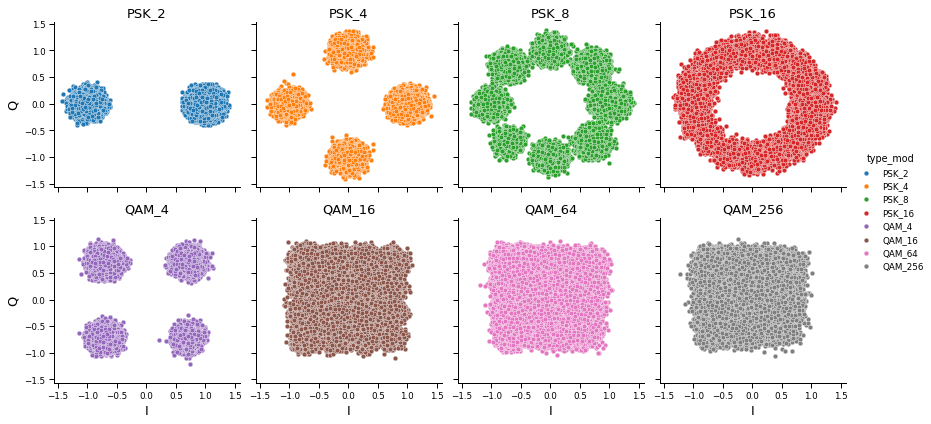

In [ ]:
df_prep = make_noise(scale_data(df),20).copy()
i = 0
df_plot_2 = pd.DataFrame()
type_mod = df_prep.type_sig.unique()
for part in tqdm(range(0000,8 * len(lens_sig),len(lens_sig))):
    x = np.array(df_prep.signal_IQ.iloc[part:part + len(lens_sig)].to_list()).ravel().real
    y = np.array(df_prep.signal_IQ.iloc[part:part + len(lens_sig)].to_list()).ravel().imag
    df_add = pd.DataFrame()
    df_add['real'] = x
    df_add['imag'] = y
    df_add['type_mod'] = type_mod[i]
    df_plot_2 = pd.concat([df_plot_2, df_add])
    i+=1
df_plot_2
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":13})
plt.figure(figsize=(25, 15))
grid = sns.FacetGrid(df_plot_2.drop_duplicates(), col = "type_mod", hue = "type_mod"
                     ,col_wrap=4
                     , margin_titles=True)
grid.map(sns.scatterplot, "real", "imag")
grid.add_legend()
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.set_axis_labels("I", "Q")
plt.show()
df_plot_2.to_csv('signals_noise.csv')

<Figure size 1440x720 with 0 Axes>

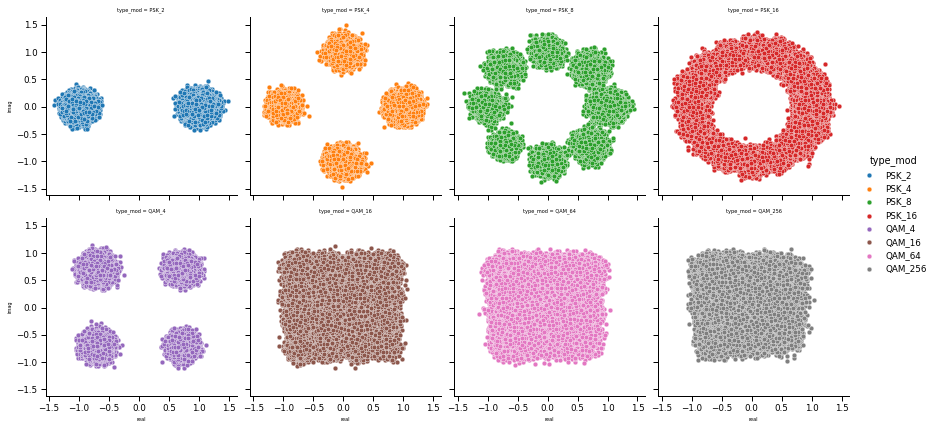